In [2]:
import csv
import matplotlib as plt
with open('BigBasket Products.csv','r') as csvfile :
    reader = csv.DictReader(csvfile)
    print(reader.fieldnames)

['index', 'product', 'category', 'sub_category', 'brand', 'sale_price', 'market_price', 'type', 'rating', 'description']


In [3]:
import csv
with open('BigBasket Products.csv','r',encoding = "utf8") as csvfile :
    reader = csv.DictReader(csvfile)
    

    cheap_pro = [row for row in reader if row["sale_price"] < row["market_price"]]
    no_of_cheap_pro = len(cheap_pro)
    print(no_of_cheap_pro)
    

13807


In [4]:
import csv
with open('BigBasket Products.csv','r',encoding = "utf8") as csvfile :
    reader = csv.DictReader(csvfile)
    

    all_pro = [row["product"] for row in reader]
    total_no_pro = len(all_pro)
    print(total_no_pro)
        

27555


In [5]:
import pandas as pd
df = pd.read_csv('BigBasket Products.csv')
df.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27555 non-null  int64  
 1   product       27554 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27554 non-null  object 
 5   sale_price    27555 non-null  float64
 6   market_price  27555 non-null  float64
 7   type          27555 non-null  object 
 8   rating        18929 non-null  float64
 9   description   27440 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.1+ MB


## Cleaning


In [7]:
#dropping nulls in brand
cond = [row for row in df['brand'].isnull()]
df = df.drop(df[cond].index)

#dropping nulls in product
cond = [row for row in df['product'].isnull()]
df = df.drop(df[cond].index)
#df[cond]

#filling nulls in description
df['description'].fillna("No Description",inplace = True)

In [8]:
#replacing null ratings 
mean = df['rating'].mean()
df['rating'].fillna(mean,inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27553 entries, 0 to 27554
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27553 non-null  int64  
 1   product       27553 non-null  object 
 2   category      27553 non-null  object 
 3   sub_category  27553 non-null  object 
 4   brand         27553 non-null  object 
 5   sale_price    27553 non-null  float64
 6   market_price  27553 non-null  float64
 7   type          27553 non-null  object 
 8   rating        27553 non-null  float64
 9   description   27553 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.3+ MB


## EDA

In [10]:
df.shape

(27553, 10)

In [11]:
df.columns

Index(['index', 'product', 'category', 'sub_category', 'brand', 'sale_price',
       'market_price', 'type', 'rating', 'description'],
      dtype='object')

In [12]:
df.dtypes

index             int64
product          object
category         object
sub_category     object
brand            object
sale_price      float64
market_price    float64
type             object
rating          float64
description      object
dtype: object

In [13]:
df["sale_price"].describe()

count    27553.000000
mean       322.529145
std        486.277432
min          2.450000
25%         95.000000
50%        190.000000
75%        359.000000
max      12500.000000
Name: sale_price, dtype: float64

In [14]:
cond1 = df["sale_price"] < df["market_price"]
df_cheap = df[cond1]
df_cheap

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.00,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.00,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
5,6,Germ - Removal Multipurpose Wipes,Cleaning & Household,All Purpose Cleaners,Nature Protect,169.00,199.0,Disinfectant Spray & Cleaners,3.3,Stay protected from contamination with Multipu...
10,11,Wheat Grass Powder - Raw,Gourmet & World Food,Cooking & Baking Needs,NUTRASHIL,261.00,290.0,Flours & Pre-Mixes,4.0,Wheatgrass is a superfood potent health food w...
15,16,Dove Plastic Soap Case - Assorted Colour,Cleaning & Household,Bins & Bathroom Ware,Nakoda,49.00,59.0,Soap Cases & Dispensers,4.0,This soap case is made of virgin plastic which...
...,...,...,...,...,...,...,...,...,...,...
27546,27547,Organic Powder - Garam Masala,"Foodgrains, Oil & Masala",Organic Staples,Organic Tattva,152.00,160.0,Organic Masalas & Spices,4.2,Organic Tattva Garam masala is a famous spice ...
27550,27551,"Wottagirl! Perfume Spray - Heaven, Classic",Beauty & Hygiene,Fragrances & Deos,Layerr,199.20,249.0,Perfume,3.9,Layerr brings you Wottagirl Classic fragrant b...
27551,27552,Rosemary,Gourmet & World Food,Cooking & Baking Needs,Puramate,67.50,75.0,"Herbs, Seasonings & Rubs",4.0,Puramate rosemary is enough to transform a dis...
27553,27554,Green Tea - Pure Original,Beverages,Tea,Tetley,396.00,495.0,Tea Bags,4.2,"Tetley Green Tea with its refreshing pure, ori..."


In [15]:
cond2 = df["rating"] >= 4.0
sort_df = df_cheap[cond2].sort_values (by=['sale_price'],ascending = False) 
sort_df

<ipython-input-15-93de6942f6c3>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sort_df = df_cheap[cond2].sort_values (by=['sale_price'],ascending = False)


,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
1766,1767,Good Girl Eau De Parfum For Women,Beauty & Hygiene,Fragrances & Deos,Carolina Herrera,6660.0,7400.0,Eau De Parfum,5.0,Well behaved girls rarely make history...GOOD ...
17767,17768,Eau De Toilette For Men,Beauty & Hygiene,Fragrances & Deos,Bentley,4905.0,5450.0,Eau De Toilette,5.0,"Gentlemen, make way for Bentley for Men, the f..."
13559,13560,"Dog Food - Super Premium, Focus, Puppy, Limite...","Kitchen, Garden & Pets",Pet Food & Accessories,Drools,4675.0,5500.0,Pet Meals & Treats,4.6,Drools Optimum Performance Adult Pet food is a...
2365,2366,Pro Expert Nutrition Large Breed Puppy (3-18 M...,"Kitchen, Garden & Pets",Pet Food & Accessories,Pedigree,4480.0,5600.0,Pet Meals & Treats,5.0,Different dog breeds have different nutritiona...
3044,3045,Induction Base Pressure Cooker IFP50,"Kitchen, Garden & Pets",Cookware & Non Stick,Hawkins Futura,4199.0,4350.0,Pressure Cookers,5.0,"A beautiful combination of form and function, ..."
...,...,...,...,...,...,...,...,...,...,...
12601,12602,"Mint - Sugarfree, Fruity Flavour",Snacks & Branded Foods,Chocolates & Candies,Center Fresh,9.0,10.0,"Toffee, Candy & Lollypop",4.2,All new Center Fresh Mints - Chali Hawa Mastaa...
4658,4659,Milk Shakti Biscuits - With The Goodness Of Milk,Snacks & Branded Foods,Biscuits & Cookies,Parle,9.0,10.0,Glucose & Milk Biscuits,4.2,Milk Shakti is a power-packed biscuit fortifie...
24901,24902,Munch Crisp-Pop Chocolate Coated Crunchy Wafer,Snacks & Branded Foods,Chocolates & Candies,Nestle,8.5,10.0,Chocolates,4.2,Nestle MUNCH CRISP POP - a first of kind varia...
14106,14107,Herbal Apple Massage Cream,Beauty & Hygiene,Skin Care,Olivia,8.5,10.0,Body Care,4.3,Let the goodness of Green Apple extracts enliv...


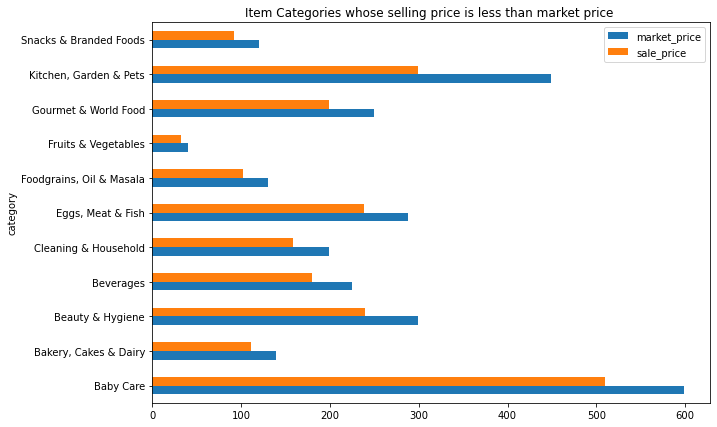

In [16]:
import numpy as np
pivot_cheap = pd.pivot_table(df[cond1], index = ["category"],values=['market_price','sale_price'],aggfunc= np.median).plot.barh(figsize=(10,7),title='Item Categories whose selling price is less than market price ')
#pivot_cheap.head(50)

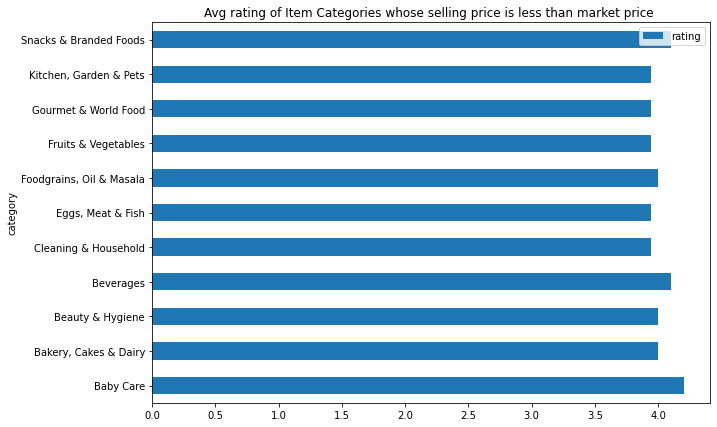

In [17]:
pivot_cheap = pd.pivot_table(df[cond1], index = ["category"],values=['rating'],aggfunc= np.median).plot.barh(figsize=(10,7),title='Avg rating of Item Categories whose selling price is less than market price ')

In [18]:
#Top 5 brands of each category by avg rating
top_brands_per_category = {}
category_ratings  = df.groupby(['category'])['rating'].mean().sort_values(ascending = False)
for i in category_ratings.index : 
    cat_data = df[df['category']==i]
    top_brands = cat_data.groupby(['brand'])['rating'].mean().sort_values(ascending = False).head()
    top_brands_per_category[i]  = top_brands
top_brands_per_category

{'Beverages': brand
 Tata Sampann    5.000
 Pukka           5.000
 Sunfeast        4.875
 Ammae           4.500
 Maltova         4.500
 Name: rating, dtype: float64,
 'Foodgrains, Oil & Masala': brand
 Ogara          5.0
 Trucrose       5.0
 DIVING DUCK    5.0
 Annai          5.0
 Orino          5.0
 Name: rating, dtype: float64,
 'Baby Care': brand
 Cetaphil      4.700
 BIOTIQUE      4.650
 Dexolac       4.525
 Dabur Amla    4.500
 Amul          4.500
 Name: rating, dtype: float64,
 'Snacks & Branded Foods': brand
 Naagin           5.0
 ENE              5.0
 BA KABRA         5.0
 Bhuira           5.0
 Jiva Ayurveda    5.0
 Name: rating, dtype: float64,
 'Gourmet & World Food': brand
 Soyvita       5.0
 Pez           5.0
 La Costena    5.0
 Scotti        5.0
 Silk          5.0
 Name: rating, dtype: float64,
 'Cleaning & Household': brand
 QIPS                  5.0
 Release on            5.0
 B2B                   5.0
 Healing Touch         5.0
 Berger BreatheEasy    5.0
 Name: rating, 

In [19]:
df1 = df.set_index(['category','brand'])
df1.sort_index(inplace = True)
df1#.groupby['brand']

index  \
category               brand              
Baby Care              1st Bites  10123   
                       1st Bites  24137   
                       Amul       10431   
                       Aptamil     6723   
                       Aptamil    17787   
...                                 ...   
Snacks & Branded Foods sumeru     18596   
                       sumeru     21587   
                       sumeru     23440   
                       sumeru     23564   
                       sumeru     26407   

                                                                            product  \
category               brand                                                          
Baby Care              1st Bites                        Ragi - Stage-1, 6-24 Months   
                       1st Bites                 Ragi & Dal - Stage-2, 8- 24 Months   
                       Amul                       Spray Infant Milk Food/Substitute   
                       Aptamil    Follow Up Infant Formula Powder - Stage 2, Fro...   
                       Aptamil    Follow Up Infant Formula Powder - Stage-3, Fro...   
...                                                                             ...   
Snacks & Branded Foods sumeru                               Chicken Garlic Sausages   
                       sumeru                                          Jumbo Prawns   
                       sumeru                       Masala French Fries - Piri Piri   
                       sumeru                              Chicken Cocktail Sausage   
                       sumeru                                  Breaded Fish Fillets   

                                             sub_category  sale_price  \
category               brand                                            
Baby Care              1st Bites      Baby Food & Formula       250.0   
                       1st Bites      Baby Food & Formula       265.0   
                       Amul           Baby Food & Formula       380.0   
                       Aptamil        Baby Food & Formula       715.0   
                       Aptamil        Baby Food & Formula       715.0   
...                                                   ...         ...   
Snacks & Branded Foods sumeru     Frozen Veggies & Snacks       300.0   
                       sumeru     Frozen Veggies & Snacks       245.0   
                       sumeru     Frozen Veggies & Snacks        49.5   
                       sumeru     Frozen Veggies & Snacks       125.0   
                       sumeru     Frozen Veggies & Snacks       246.5   

                                  market_price                   type  rating  \
category               brand                                                    
Baby Care              1st Bites         250.0      Organic Baby Food     4.2   
                       1st Bites         265.0      Organic Baby Food     4.0   
                       Amul              380.0         Infant Formula     4.5   
                       Aptamil           715.0         Infant Formula     4.5   
                       Aptamil           715.0         Infant Formula     3.9   
...                                        ...                    ...     ...   
Snacks & Branded Foods sumeru            300.0  Frozen Non-Veg Snacks     4.1   
                       sumeru            350.0  Frozen Non-Veg Snacks     3.1   
                       sumeru             55.0      Frozen Veg Snacks     4.3   
                       sumeru            125.0  Frozen Non-Veg Snacks     4.1   
                       sumeru            290.0  Frozen Non-Veg Snacks     2.8   

                                                                        description  
category               brand                                                         
Baby Care              1st Bites  Ragi is a well known millet filled with numero...  
                       1st Bites  1st Bites Ragi Dal is a superb supplement from

In [20]:
#Count no. of Unique brands
import numpy as np
brands = np.array([row for row in df['brand']])
unique_brands = np.unique(brands)
len(unique_brands)

2313

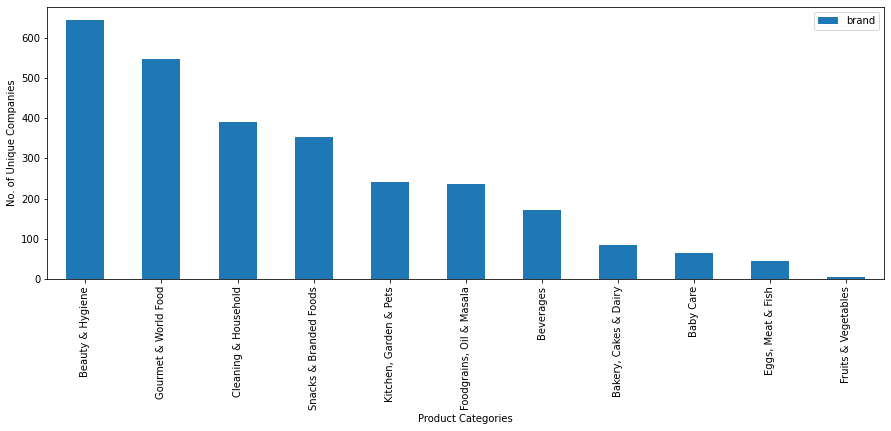

In [21]:
#finding out the distribution of brands among categories using nunique methods
DF = df.groupby(['category'])['brand'].nunique().sort_values(ascending = False)
DF = pd.DataFrame(DF)
DF.plot(figsize=(15,5), kind = 'bar',ylabel='No. of Unique Companies',xlabel='Product Categories');


In [22]:
DF['Categories'] = ['Beauty & Hygiene','Gourmet & World Food','Cleaning & Household','Snacks & Branded Foods','Kitchen, Garden & Pets','Foodgrains, Oil & Masala','Beverages','Bakery Cakes & Dairy','Baby Care','Eggs Meat & Fish','Fruits & Vegetables']


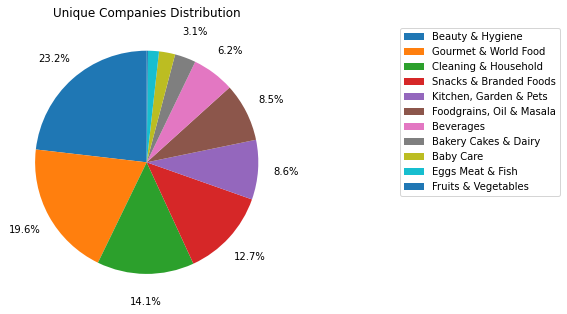

In [132]:
import matplotlib.pyplot as plt

#DF.plot.pie(y=['category'],figsize=(13,10),startangle=90,labels=None,legend = True)
#plt.legend(loc = 'best')
y = np.array(DF['brand'])

def autopct_format(pct):
    return f'{pct:.1f}%' if pct >= 2.5 else ''

plt.figure(figsize = (5,16))
plt.pie(y,startangle = 90, autopct=autopct_format,pctdistance=1.25)
plt.legend(DF['Categories'],bbox_to_anchor=(2, 1))
plt.title("Unique Companies Distribution")
plt.show()

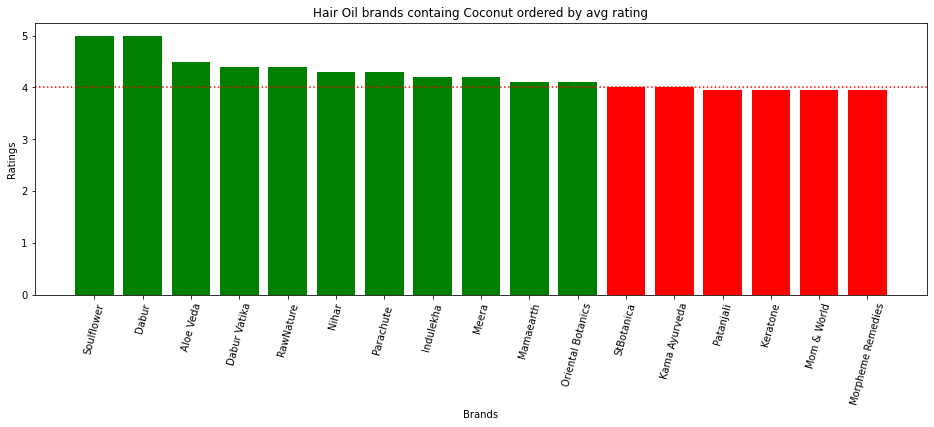

In [107]:
#finding the best hair oils containing Coconut
Coconut_containing_oil = {}
cond = df['type'] == 'Hair Oil & Serum'

descriptions = df[cond]['description']
for i in descriptions.index:
    if 'Coconut' in descriptions[i] :
        Coconut_containing_oil[df['brand'][i]]=df['rating'][i]
       # Coconut_containing_oil['ratng']=df['rating'][i]
    else: continue

#Coconut_containing_oil_df = set(Coconut_containing_oil)
#Coconut_containing_oil_df = list(Coconut_containing_oil_df)
category = list(Coconut_containing_oil.keys())
values = list(Coconut_containing_oil.values())
values.sort(reverse = True)
#category = np.array(sorted_dict.keys())
arr = []
def cl():
    for i in range(len(values)) : 
        if values[i] > 4.0:
            arr.append('green')
        else : 
            arr.append('red')
cl()
plt.figure(figsize = (16,5))
threshold_min = 4.0
plt.xticks(rotation = 75)
plt .bar(category,values, color = arr)
plt.title("Hair Oil brands containg Coconut ordered by avg rating")
plt.ylabel("Ratings")
plt.xlabel("Brands")
plt.axhline(threshold_min, color='red', ls='dotted')
plt.show()
#df_preferred = df[cond]['brand'].isin(Coconut_containing_oil_df)


In [131]:
#To get top 5 products with highest discount of each category
df['discount%'] = (df['market_price'] - df['sale_price'])*100/df['market_price']
cond3 = df['discount%'] > 0
discounted_categories = df[cond3].groupby(['category'])['discount%'].mean().sort_values(ascending = False)
top_products_with_discount_per_cat = {}
for i in discounted_categories.index:
    cat_data = df[cond3][df['category'] == i]
    top_products_with_discount = cat_data.groupby(['product'])['discount%'].mean().sort_values(ascending = False).head()
    top_products_with_discount_per_cat[i]  = top_products_with_discount
top_products_with_discount_per_cat


<ipython-input-131-17682d7ddfb7>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cat_data = df[cond3][df['category'] == i]


{'Kitchen, Garden & Pets': product
 Fruit & Vegetables Hand Juicer                                           82.506266
 Small Silicone Spatula With Plastic Handle - Assorted Colours            81.203008
 Decorative Party Light Big Star String LED Light 2 M - Multicolour       80.982712
 Decorative Party Light Golden Bell String LED Light 7 M - Multicolour    79.239620
 Decorative Party Light Golden Bell String LED Light 7 M - Warm White     79.239620
 Name: discount%, dtype: float64,
 'Fruits & Vegetables': product
 Bitter Gourd          60.400000
 Beetroot              56.800000
 Cucumber              56.440000
 Baby Corn - Peeled    56.190476
 Cauliflower           56.169697
 Name: discount%, dtype: float64,
 'Beverages': product
 Health & Nutrition Drink Mix for Kids (Chocolate)    62.248996
 Juice - Mixed Fruit Merry                            53.021212
 Xtra Coffee Pouch                                    50.000000
 Natural Hangover & Liver Detox Drink - Mint          50.000000
 T

In [94]:
df.loc[df[cond3][df['category']=='Kitchen, Garden & Pets']['discount%'].sort_values(ascending=False).head().index]

<ipython-input-94-e11e8dd24625>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.loc[df[cond3][df['category']=='Kitchen, Garden & Pets']['discount%'].sort_values(ascending=False).head().index]


,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description,discount%
17713,17714,Fruit & Vegetables Hand Juicer,"Kitchen, Garden & Pets",Kitchen Accessories,Triones,349.0,1995.0,Kitchen Tools & Other Accessories,1.9,Hand juicer for fruits and vegetables in steel...,82.506266
13318,13319,Small Silicone Spatula With Plastic Handle - A...,"Kitchen, Garden & Pets",Bakeware,HAZEL,75.0,399.0,Baking Tools & Brushes,3.9,"This silicone spatula is safety-tested, heat r...",81.203008
13740,13741,Decorative Party Light Big Star String LED Lig...,"Kitchen, Garden & Pets",Appliances & Electricals,Lexton,209.0,1099.0,CFL & Led Bulbs,3.2,Bring home these bright and festive lights fro...,80.982712
13265,13266,Decorative Party Light Golden Bell String LED ...,"Kitchen, Garden & Pets",Appliances & Electricals,Lexton,415.0,1999.0,CFL & Led Bulbs,4.4,These string lights can be used anywhere for d...,79.239620
11473,11474,Decorative Party Light Golden Bell String LED ...,"Kitchen, Garden & Pets",Appliances & Electricals,Lexton,415.0,1999.0,CFL & Led Bulbs,3.6,These string lights can be used anywhere for d...,79.239620


In [95]:
df.corr()
#It is clearly evident that the discount is -vely correlated with rating, means that low rating products are usually having high discount.

,index,sale_price,market_price,rating,discount%
index,1.000000,0.004904,0.005483,0.002098,0.001545
sale_price,0.004904,1.000000,0.965198,-0.049230,0.016276
market_price,0.005483,0.965198,1.000000,-0.062248,0.168837
rating,0.002098,-0.049230,-0.062248,1.000000,-0.058883
discount%,0.001545,0.016276,0.168837,-0.058883,1.000000


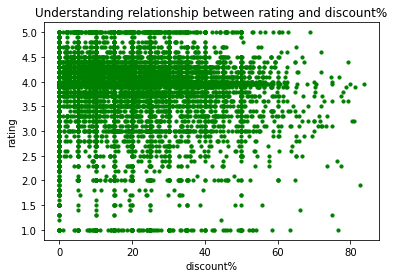

In [99]:
plt.scatter(df['discount%'],df['rating'],marker = 'o',color = 'green',s=10)
#plt.xlabel("rating")
plt.xlabel("discount%")
plt.ylabel("rating")
plt.title("Understanding relationship between rating and discount%")
plt.show()